In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file

In [2]:
data = pd.read_csv('../data/clean_data.csv')
encoded_data = pd.read_csv('../data/encoded_data.csv')

In [3]:
encoded_data.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,1,2,2,1,0,7,2,1
1,49,279,8,1,3,61,2,2,2,5130,...,1,7,0,1,1,1,1,6,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,1,2,2,4,1,2,2,1


First thing is to check out the distributions of all the data

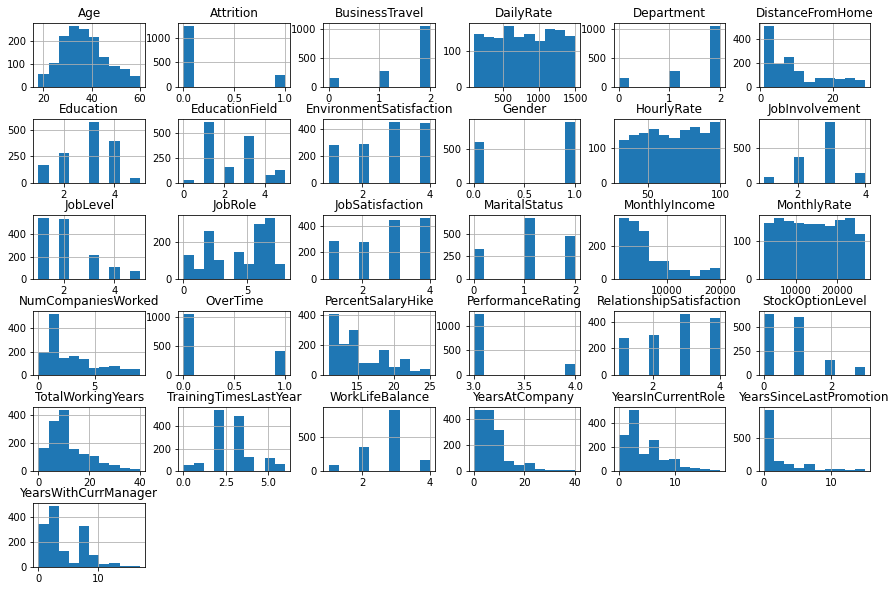

In [4]:
encoded_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

There are a few clear patterns in the distributions. `Age` is normal. `DailyRate`, `HourlyRate` and `MonthlyRate` seem to to mostly uniform. `DistanceFromHome`, `NumCompaniesWorked`, `PercentSalaryHike`, `TotalWorkingYears`, `YearsAtCompany`, and `YearsInCurrentRole` all seem to be skewed right.

The attrition is lopsided. It may be useful to checkout the feature distribution for when attrition is equal to 1.

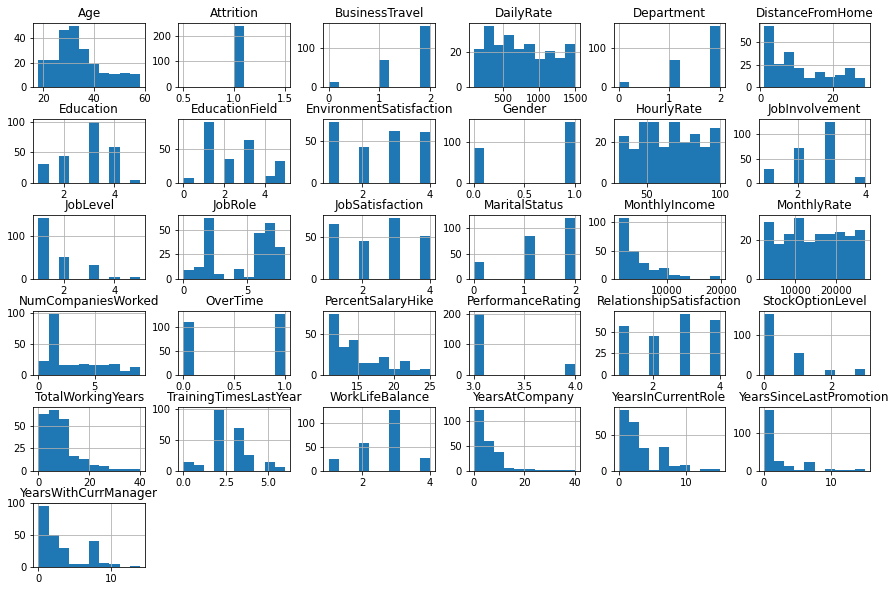

In [5]:
encoded_data[encoded_data['Attrition']==1].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

The distributions are still pretty similar to before. There seems to be the most change in `OverTime` and `MaritalStatus`. There are some minor changes to the distribution in `JobSatisfaction` and `StockOptionLevel`.

A correlation matrix seems useful here to check out what features are most correlated with one another.

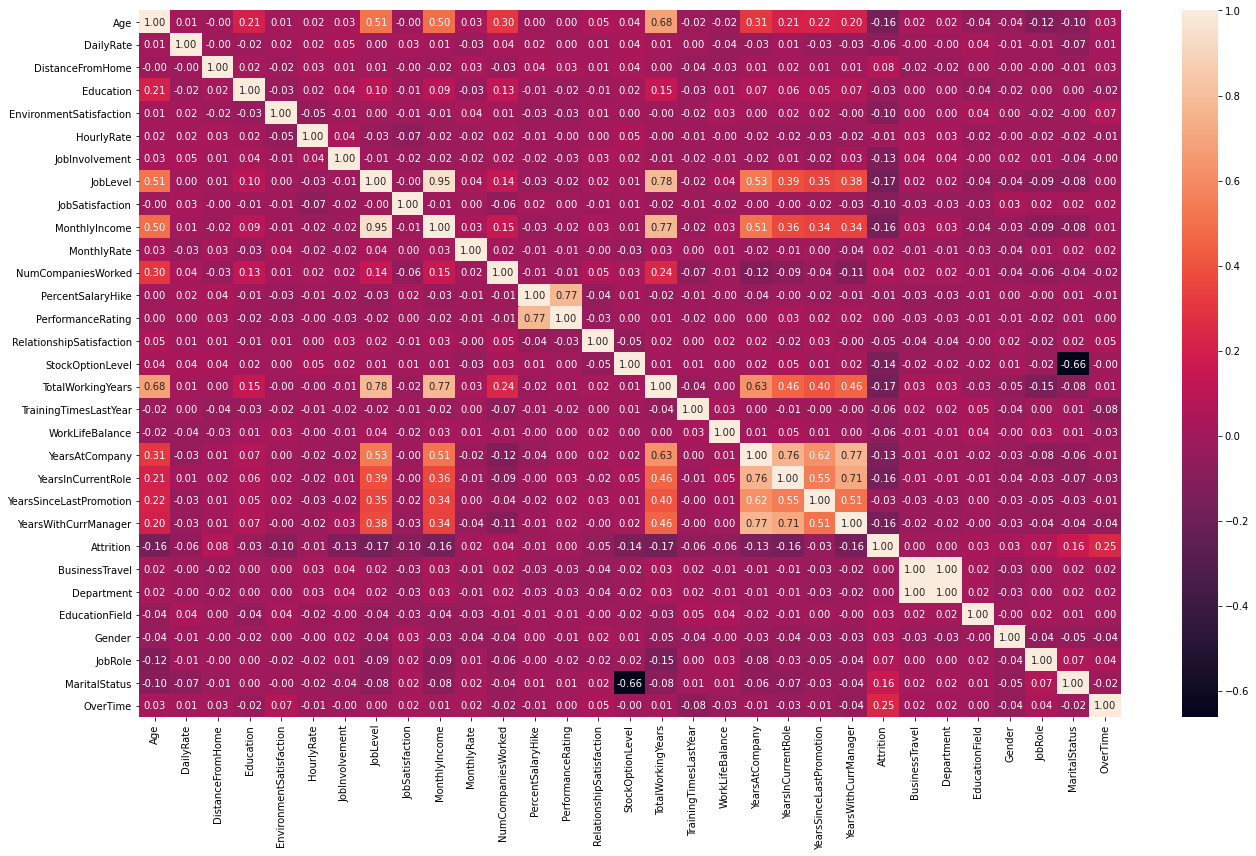

In [6]:
plt.subplots(figsize=(22, 13))
sns.heatmap(encoded_data.corr(), annot=True, fmt='.2f')
plt.show()

This correlation map, in general, isn't totally useful. Most features have little to no correlation with other featuers. Attrition seems to have a few slightly correlated features like `OverTime` and `MaritalStatus`. There are quite a few negatively correlated features like `Age`, `JobLevel`, `MonthlyIncome` and `TotalWorkingYears`.

There also seems to be one section of the map that has highly correlated features. Unsuprisingly, these are all the features that measure an amount of time such as `YearInCurrentRole` and `YearAtCompany`.

Time to dig deeper on `OverTime`:

In [7]:
overTimeAndAttrition = encoded_data[(encoded_data['OverTime']==1) & (encoded_data['Attrition']==1)]
attrition1 = encoded_data['Attrition']==1
print(100*len(overTimeAndAttrition)/sum(attrition1))

53.586497890295355


Looks like that majority of people who are doing over time are also feeling worm down.

Time to check out `MaritalStatus`:

In [8]:
divorcedAndAttrition = encoded_data[(encoded_data['MaritalStatus']==0) & (encoded_data['Attrition']==1)]
print(100*len(divorcedAndAttrition)/sum(attrition1))

13.924050632911392


In [9]:
marriedAndAttrition = encoded_data[(encoded_data['MaritalStatus']==1) & (encoded_data['Attrition']==1)]
print(100*len(marriedAndAttrition)/sum(attrition1))

35.44303797468354


In [10]:
singleAndAttrition = encoded_data[(encoded_data['MaritalStatus']==2) & (encoded_data['Attrition']==1)]
print(100*len(singleAndAttrition)/sum(attrition1))

50.63291139240506


Single people seem to be most susceptible to feeling burnt out. Let's see histograms for the single and who reported yes to attrition.

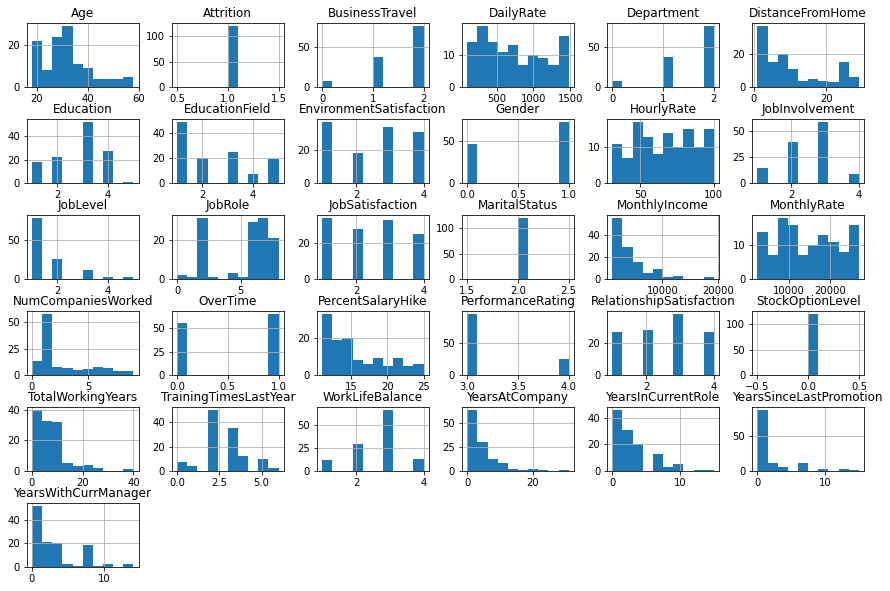

In [32]:
singleAndAttrition.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

Distributions seem mostly the same, but what is clear is that single folks with high attrition all have a low stock option level. 

#### Feature Selection

It makes senses to drop some of the features that have no correlation to any of the others.

In [11]:
dropped_features = ['EnvironmentSatisfaction', 
                    'JobInvolvement',
                    'EducationField', 
                    'DistanceFromHome', 
                    'DailyRate',
                    'HourlyRate',
                    'RelationshipSatisfaction',
                    'Gender',
                    'WorkLifeBalance',
                    'MonthlyRate']
encoded_dropped_features = encoded_data.drop(dropped_features,  axis=1)

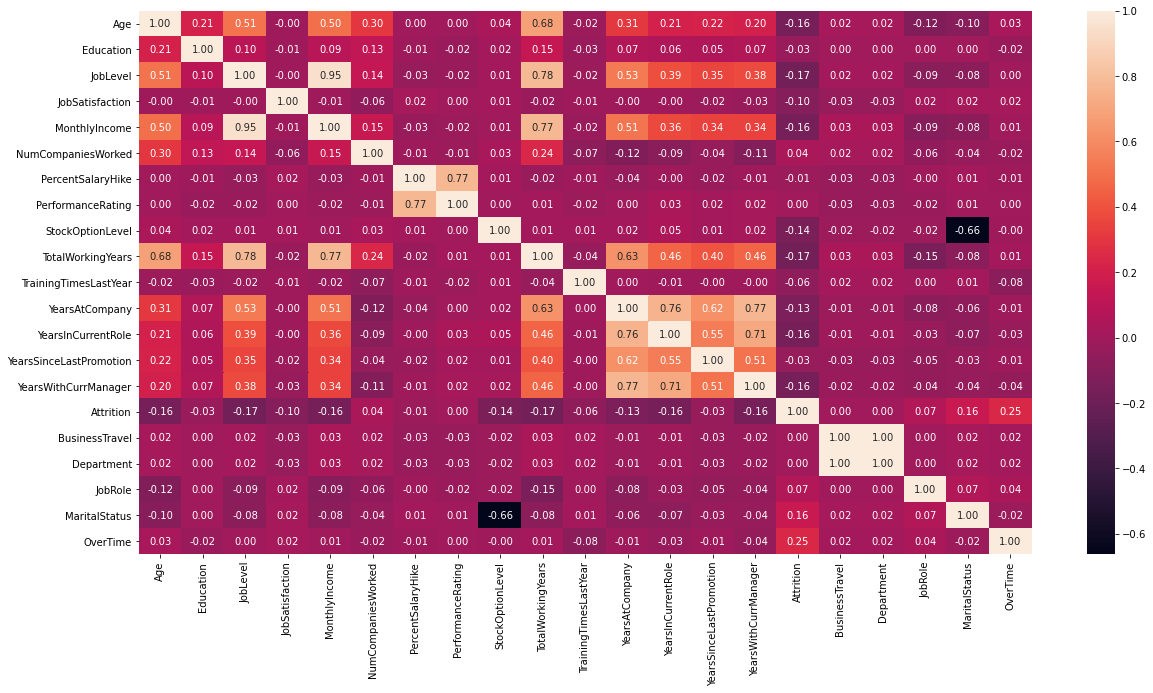

In [12]:
plt.subplots(figsize=(20, 10))
sns.heatmap(encoded_dropped_features.corr(), annot=True, fmt='.2f')
plt.show()

This heatmap is a bit cleaner now that some of the features with 0 correlations have been removed.

#### Save data

In [13]:
# save the data to a new csv file
datapath = '../data'
save_file(encoded_dropped_features, 'encoded_dropped_features_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/encoded_dropped_features_data.csv"
